In [1]:
import torch
import pandas as pd
from models.RecSysFlat import RecSysGarbageNetV2
import data_mgmt.RecSysData as rsd
from data_mgmt.RecSysDataTest import TestRecSysData
import seaborn as sns
import numpy as np

In [2]:
ppath="//home/rster/sw/cmu_msba_2022_ml_applications_2/data/"
PATH='//home/rster/sw/cmu_msba_2022_ml_applications_2/src/models/saved/jimlad.pkl'
test_data_file = ppath+"pairs_Rating.txt"

omfg = rsd.RecSysData(ppath)
trsd = TestRecSysData(omfg.df_data, test_data_file,
                        transform=omfg.transform)

tdl1 = torch.utils.data.DataLoader(omfg, batch_size=50000, shuffle=False)
tdl2 = torch.utils.data.DataLoader(trsd, batch_size=50000, shuffle=False)

n_user = omfg.df_data.uid.unique().shape[0] #+ wtfbbq.df_data.uid.unique().shape[0]
n_item = omfg.df_data.pid.unique().shape[0]

model = RecSysGarbageNetV2(n_user,n_item,300)

model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [3]:
def test_loop(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss = torch.zeros(1).cuda()
    predictions=[]

    with torch.no_grad():
        for X in dataloader:
            pred = model(X.type(torch.long)).flatten()
            predictions.append(pred)

    return predictions

In [4]:
PREDICTIT = test_loop(tdl2, model)
outoutout=trsd.df_data.copy()
outoutout['rating']=PREDICTIT[0].numpy()
ininin = omfg.df_data.copy()

In [5]:
outoutout.to_csv('treeworld.csv')

In [6]:
#outoutout.rating = np.round(outoutout.rating)
outoutout.loc[outoutout.rating < 1.0,'rating'] = 1.0
outoutout.loc[outoutout.rating > 5.0,'rating'] = 5.0

In [7]:
ininin['set']='train'
outoutout['set']='test'
full=ininin.append(outoutout)

In [8]:
full.to_csv('yas2.csv')

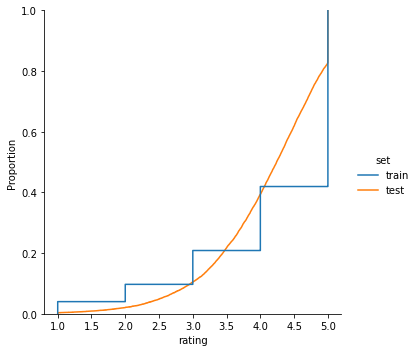

In [9]:
sns.displot(data=full.reset_index(),x='rating',kind='ecdf',hue='set')

In [10]:
with open('pairs_Rating_2021_12_09_212121_noround.txt','w') as filee:
    for i in range(len(outoutout)):
        filee.write(f"{outoutout.reviewerID.iloc[i]}-{outoutout.itemID.iloc[i]},{outoutout.rating.iloc[i]}\n")

In [17]:
f"{torch.Tensor([3]).numpy()[0]:.3e}"

'3.000e+00'

In [11]:
for i in range(len(outoutout)):
    print(outoutout.reviewerID.iloc[i])

U566642233
U150556394
U835748092
U636069453
U336431363
U758414122
U130225570
U648205745
U776921293
U096413293
U305763976
U939531966
U271645375
U250426154
U387549723
U270454652
U636266377
U900965053
U926405702
U090866101
U581492151
U606843232
U962588101
U664239707
U497093539
U274419064
U929175090
U919435085
U810288046
U062151094
U875273718
U357609398
U813537135
U457379608
U393983418
U492548292
U443028966
U709002229
U146900934
U483948589
U655294618
U527436214
U032175184
U154458239
U204380203
U139642384
U359726789
U895418946
U099956541
U250211662
U757149546
U149906834
U771032515
U407686177
U979511532
U100733791
U207126270
U608155709
U880130901
U723529849
U705397837
U411420531
U639812787
U530595981
U831083794
U029043020
U870781557
U037378587
U561367260
U534841240
U893528551
U601525940
U939886257
U006942882
U281187905
U612051865
U037346614
U220047452
U652087716
U314308331
U805048712
U149144645
U880993028
U568419040
U334267446
U248217934
U768518672
U786518215
U727878148
U757334934
U694636251